    Install modules

In [57]:
import seaborn as sns
import rasterio
import numpy as np
import geopandas
import pandas as pd
import numpy.random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv
from shapely.strtree import STRtree
from scipy.ndimage import gaussian_filter
import geopandas as gpd

from rasterio.plot import show

Load crime data data 

In [4]:
crime = gpd.read_file('C:/GIS_Course/EGM_722_Programming_for_GIS/ProjectData/crimeData/2022-02/crimeDataEdit3.csv') #crime data csv
crime.crs = 'epsg:27700'
crime.head 

<bound method NDFrame.head of                                             WKT    Month              X  \
0     POINT (599261.905971669 249257.230574292)  2022-02  0.90825100000   
1     POINT (599365.899443736 249576.241500435)  2022-02  0.90995400000   
2     POINT (599261.905971669 249257.230574292)  2022-02  0.90825100000   
3      POINT (599161.89048438 249528.304176689)  2022-02  0.90695100000   
4      POINT (599161.89048438 249528.304176689)  2022-02  0.90695100000   
...                                         ...      ...            ...   
4471                                POINT EMPTY  2022-02  0.00000000000   
4472                                POINT EMPTY  2022-02  0.00000000000   
4473                                POINT EMPTY  2022-02  0.00000000000   
4474                                POINT EMPTY  2022-02  0.00000000000   
4475                                POINT EMPTY  2022-02  0.00000000000   

                   Y                    Crime_type  \
0     52.105755

Load parish data

In [67]:
parishes = gpd.read_file('C:/GIS_Course/EGM_722_Programming_for_GIS/ProjectData/parishBound.csv') #csv with wkt for parish boundaries
parishes.crs = 'epsg:27700'
parishes.head

<bound method NDFrame.head of                                                    WKT OBJECTID PD_ID  \
0    MULTIPOLYGON (((601704.701 253781.905,601737.4...     1534  MRNG   
1    MULTIPOLYGON (((604662.501 255212.495,604688.3...     1535  MBTT   
2    MULTIPOLYGON (((602301.998 251004.6,602329.998...     1536  MGBR   
3    MULTIPOLYGON (((600038.201 261253.496,600071.0...     1537  MSHE   
4    MULTIPOLYGON (((600928.099 258621.3,600937.004...     1538  MGFI   
..                                                 ...      ...   ...   
772  MULTIPOLYGON (((604662.501 255212.495,604698.3...    28945  MBDL   
773  MULTIPOLYGON (((607822.1 255743.803,607830.303...    28946  MNMN   
774  MULTIPOLYGON (((608122.698 254787.397,608126.4...    28947  MNMS   
775  MULTIPOLYGON (((601334.102 254683.297,601346.8...    28948  MCOM   
776  MULTIPOLYGON (((601208.101 254865.105,601225.5...    28949  MLFI   

             County            Distric_Bo                         Ward  \
0    Suffolk County

Convert dataframe to geodataframe with geometry values. MAY NOT BE NEEDED

In [201]:
#crime = geopandas.GeoDataFrame(
    #df, geometry=geopandas.points_from_xy(df.X, df.Y))
#crime.crs = 'epsg:27700'
#crime.head

<bound method NDFrame.head of         Month         X          Y                    Crime type  \
0     2022-02  0.908251  52.105755     Criminal damage and arson   
1     2022-02  0.909954  52.108582     Criminal damage and arson   
2     2022-02  0.908251  52.105755  Violence and sexual offences   
3     2022-02  0.906951  52.108225  Violence and sexual offences   
4     2022-02  0.906951  52.108225  Violence and sexual offences   
...       ...       ...        ...                           ...   
4471  2022-02       NaN        NaN  Violence and sexual offences   
4472  2022-02       NaN        NaN  Violence and sexual offences   
4473  2022-02       NaN        NaN  Violence and sexual offences   
4474  2022-02       NaN        NaN  Violence and sexual offences   
4475  2022-02       NaN        NaN  Violence and sexual offences   

                  geometry  
0     POINT (0.908 52.106)  
1     POINT (0.910 52.109)  
2     POINT (0.908 52.106)  
3     POINT (0.907 52.108)  
4     PO

Test gdf have same crs

In [34]:
print(crime.crs == parishes.crs)

True


Display gdf layer

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


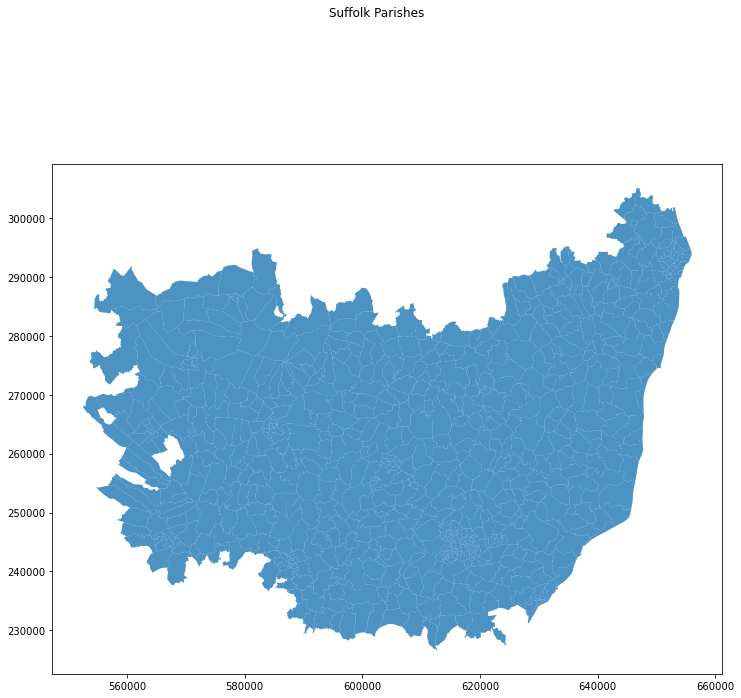

In [35]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = parishes.plot(axes=ax, alpha=0.8) #adjust alpha value to change colour intensity
#ax.set_axis_off()  #uncomment this line to remove national grid numbers
f.suptitle('Suffolk Parishes')
plt.show() 

Load a single parish using row number

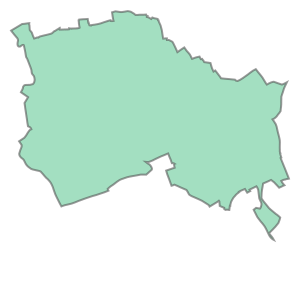

In [10]:
parishes.loc[0, 'geometry'] #adjust number to select parish

Load a basemap

In [11]:
try: #attmept to load a basemap with a guardian pattern to carry on without basemap if not available
    from mpl_toolkits.basemap import Basemap

    basemap = True
except ImportError:
    basemap = False

Plot data to scattergraph THIS NEEDS WORK!!

<AxesSubplot:>

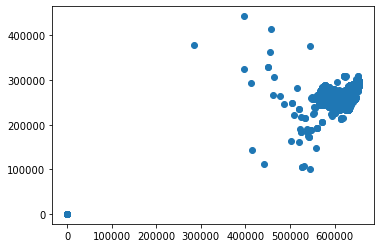

In [94]:
crime.plot()

#plt.scatter(x=df['X'], y=df['Y']) #plot scatter using csv X,Y columns
#plt.show() #show plot

#fig, axs = plt.subplots(2, 2)

#x = df['X']
#y = df['Y']

#sigmas = [0, 16, 32, 64]

#for ax, s in zip(axs.flatten(), sigmas):
    #if s == 0:
        #ax.plot(x, y, 'k.', markersize=5)
        #ax.set_title("Scatter plot")
    #else:
        #for ax, interp_method in zip(axs.flat, methods):
            #ax.imshow(df, interpolation=interp_method, cmap='viridis')
            #ax.set_title(str(interp_method))

#plt.show()

Join the two tables, crime and parish

In [36]:
join = gpd.sjoin(parishes, crime, how='inner', lsuffix='left', rsuffix='right') # perform the spatial join
join # show the joined table

,WKT_left,OBJECTID,PD_ID,County,Distric_Bo,Ward,Parish,geometry,index_right,WKT_right,Month,X,Y,Crime_type
2,"MULTIPOLYGON (((602301.998 251004.6,602329.998...",1536,MGBR,Suffolk County,Mid Suffolk District,Battisford & Ringshall Ward,Great Bricett CP,"MULTIPOLYGON (((602301.998 251004.600, 602329....",2272,POINT (603920.936556142 250661.180287565),2022-02,0.97702400000,52.11666400000,Anti-social behaviour
2,"MULTIPOLYGON (((602301.998 251004.6,602329.998...",1536,MGBR,Suffolk County,Mid Suffolk District,Battisford & Ringshall Ward,Great Bricett CP,"MULTIPOLYGON (((602301.998 251004.600, 602329....",2273,POINT (605155.963871697 251138.265054078),2022-02,0.99532300000,52.12049100000,Burglary
4,"MULTIPOLYGON (((600928.099 258621.3,600937.004...",1538,MGFI,Suffolk County,Mid Suffolk District,Onehouse Ward,Great Finborough CP,"MULTIPOLYGON (((600928.099 258621.300, 600937....",2161,POINT (601466.87963432 257915.110098903),2022-02,0.94553100000,52.18269400000,Burglary
5,"MULTIPOLYGON (((600220.401 259177.101,600248.5...",1539,MONE,Suffolk County,Mid Suffolk District,Onehouse Ward,Onehouse CP,"MULTIPOLYGON (((600220.401 259177.101, 600248....",2163,POINT (602384.869897096 259599.095943035),2022-02,0.95994400000,52.19747800000,Public order
5,"MULTIPOLYGON (((600220.401 259177.101,600248.5...",1539,MONE,Suffolk County,Mid Suffolk District,Onehouse Ward,Onehouse CP,"MULTIPOLYGON (((600220.401 259177.101, 600248....",2160,POINT (602011.908912181 259712.068186253),2022-02,0.95456200000,52.19862900000,Burglary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,"MULTIPOLYGON (((608122.698 254787.397,608126.4...",28947,MNMS,Suffolk County,Mid Suffolk District,Needham Market Ward,Needham Market CP,"MULTIPOLYGON (((608122.698 254787.397, 608126....",2264,POINT (608545.945961306 254953.206878453),2022-02,1.04710300000,52.15347400000,Violence and sexual offences
774,"MULTIPOLYGON (((608122.698 254787.397,608126.4...",28947,MNMS,Suffolk County,Mid Suffolk District,Needham Market Ward,Needham Market CP,"MULTIPOLYGON (((608122.698 254787.397, 608126....",2266,POINT (608760.964797195 254977.174199687),2022-02,1.05025600000,52.15360800000,Violence and sexual offences
774,"MULTIPOLYGON (((608122.698 254787.397,608126.4...",28947,MNMS,Suffolk County,Mid Suffolk District,Needham Market Ward,Needham Market CP,"MULTIPOLYGON (((608122.698 254787.397, 608126....",2262,POINT (608434.999115841 254996.106485603),2022-02,1.04551000000,52.15390100000,Other theft
775,"MULTIPOLYGON (((601334.102 254683.297,601346.8...",28948,MCOM,Suffolk County,Mid Suffolk District,Onehouse Ward,Combs CP,"MULTIPOLYGON (((601334.102 254683.297, 601346....",2166,POINT (602626.881063115 255391.155771136),2022-02,0.96096800000,52.15960800000,Violence and sexual offences


In [62]:
join.groupby(['Parish', 'Crime_type']).count()

WKT_left  OBJECTID  PD_ID  County  \
Parish      Crime_type                                                        
            Anti-social behaviour              181       181    181     181   
            Bicycle theft                       18        18     18      18   
            Burglary                            30        30     30      30   
            Criminal damage and arson           92        92     92      92   
            Drugs                               36        36     36      36   
...                                            ...       ...    ...     ...   
Wrentham CP Vehicle crime                        1         1      1       1   
            Violence and sexual offences         1         1      1       1   
Yoxford CP  Anti-social behaviour                2         2      2       2   
            Criminal damage and arson            1         1      1       1   
            Violence and sexual offences         2         2      2       2   

                                          Distric_Bo  Ward  geometry  \
Parish      Crime_type                                                 
            Anti-social behaviour                181   181       181   
            Bicycle theft                         18    18        18   
            Burglary                              30    30        30   
            Criminal damage and arson             92    92        92   
            Drugs                                 36    36        36   
...                                              ...   ...       ...   
Wrentham CP Vehicle crime                          1     1         1   
            Violence and sexual offences           1     1         1   
Yoxford CP  Anti-social behaviour                  2     2         2   
            Criminal damage and arson              1     1         1   
            Violence and sexual offences           2     2         2   

                                          index_right  WKT_right  Month    X  \
Parish      Crime_type                                                         
            Anti-social behaviour                 181        181    181  181   
            Bicycle theft                          18         18     18   18   
            Burglary                               30         30     30   30   
            Criminal damage and arson              92         92     92   92   
            Drugs                                  36         36     36   36   
...                                               ...        ...    ...  ...   
Wrentham CP Vehicle crime                           1          1      1    1   
            Violence and sexual offences            1          1      1    1   
Yoxford CP  Anti-social behaviour                   2          2      2    2   
            Criminal damage and arson               1          1      1    1   
            Violence and sexual offences            2          2      2    2   

                                            Y  
Parish      Crime_type                         
            Anti-social behaviour         181  
            Bicycle theft                  18  
            Burglary                       30  
            Criminal damage and arson      92  
            Drugs                          36  
...                                       ...  
Wrentham CP Vehicle crime                   1  
            Violence and sexual offences    1  
Yoxford CP  Anti-social behaviour           2  
            Criminal damage and arson       1  
            Violence and sexual offences    2  

[731 rows x 12 columns]

In [ ]:
Display the overall number of crimes per parish

In [51]:
print(join.groupby(['Parish'])['Crime_type'].count())

Parish
                            1223
Acton CP                       7
Aldeburgh CP                  10
Aldringham cum Thorpe CP       3
Assington CP                   5
                            ... 
Worlingham CP                 13
Worlingworth CP                1
Wortham CP                     1
Wrentham CP                    2
Yoxford CP                     5
Name: Crime_type, Length: 264, dtype: int64


Clip crime data to the parishes

In [70]:
clipped = []
for parish in parishes['Parish'].unique():
    tmp_clip = gpd.clip(crime, parishes[parishes['Parish'] == parish])
    for i, row in tmp_clip.iterrows():
        tmp_clip.loc[i, 'count'] =row.count
        tmp_clip.loc[i, 'Parish'] = parish
    clipped.append(tmp_clip)

clipped_gdf = gpd.GeoDataFrame(pd.concat(clipped))
clip_total = clipped_gdf.count()

clip_total

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'Parish'] = parish
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'Parish'] = parish
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'Parish'] = parish
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'Parish'] = parish
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\gregm\AppData\Local\Temp\ipykernel_2008\2829018215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_clip.loc[i, 'count'] =row.count
C:\Users\gregm\anaconda3\envs\egm722soil\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

WKT           4358
Month         4358
X             4358
Y             4358
Crime_type    4358
geometry      4358
count         4358
Parish        4358
dtype: int64